# **Predictor de faltas a pagos de préstamos**

-------------------
## **Dataset**
--------------------

- **Default** - Yes/No, si: deudor - no: no deudor
- **Student** - Yes/No
- **Balance** - La cantidad de dinero en la cuenta bancaria.
- **Income** - Los ingresos del aplicante.

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:,.2f}'.format

In [2]:
df = pd.read_csv('Default.csv')

In [3]:
df.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.53,"44,361.63"
1,2,No,Yes,817.18,"12,106.13"
2,3,No,No,"1,073.55","31,767.14"
3,4,No,No,529.25,"35,704.49"
4,5,No,No,785.66,"38,463.50"


In [4]:
df.drop(columns = ['Unnamed: 0'], inplace = True)
df.head()

,default,student,balance,income
0,No,No,729.53,"44,361.63"
1,No,Yes,817.18,"12,106.13"
2,No,No,"1,073.55","31,767.14"
3,No,No,529.25,"35,704.49"
4,No,No,785.66,"38,463.50"


In [5]:
df.head()

,default,student,balance,income
0,No,No,729.53,"44,361.63"
1,No,Yes,817.18,"12,106.13"
2,No,No,"1,073.55","31,767.14"
3,No,No,529.25,"35,704.49"
4,No,No,785.66,"38,463.50"


In [6]:
dict_binario = {'Yes': 1, 'No': 0}

In [7]:
df['default'] = df['default'].map(dict_binario)
df['student'] = df['student'].map(dict_binario)

In [8]:
df.head()

,default,student,balance,income
0,0,0,729.53,"44,361.63"
1,0,1,817.18,"12,106.13"
2,0,0,"1,073.55","31,767.14"
3,0,0,529.25,"35,704.49"
4,0,0,785.66,"38,463.50"


In [9]:
df['default'].value_counts(normalize = True)

0   0.97
1   0.03
Name: default, dtype: float64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  int64  
 1   student  10000 non-null  int64  
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 312.6 KB


In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

In [14]:
train_error = []
test_error = []

knn_split = {}
error_knn = pd.DataFrame()

In [18]:
for k in range(1, 21):
    train_error = []
    test_error = []
    lista = []
    knn = KNeighborsClassifier(n_neighbors=k)
    print(k)
    
    for i in range(15):
        carac = ['student', 'balance', 'income']
        X_train, X_test, y_train, y_test = train_test_split(df[carac], df['default'], test_size=0.20)
        
        X_train = ss.fit_transform(X_train)
        X_test = ss.transform(X_test)
        
        knn.fit(X_train, y_train)
        
        train_error.append(1 - knn.score(X_train, y_train))
        test_error.append(1 - knn.score(X_test, y_test))
    lista.append(sum(train_error)/len(train_error))
    lista.append(sum(test_error)/len(test_error))
    knn_split[k] = lista
    print(knn_split[k])

knn_split

1
[0.0, 0.04173333333333334]
2
[0.021800000000000003, 0.03430000000000001]
3
[0.022000000000000006, 0.03423333333333334]
4
[0.024816666666666664, 0.030133333333333324]
5
[0.02483333333333333, 0.03153333333333334]
6
[0.02538333333333335, 0.029099999999999984]
7
[0.024841666666666665, 0.028699999999999986]
8
[0.025274999999999995, 0.0289]
9
[0.02575000000000002, 0.028000000000000004]
10
[0.025525000000000006, 0.02960000000000001]
11
[0.026033333333333308, 0.027766666666666665]
12
[0.026416666666666665, 0.02813333333333333]
13
[0.026391666666666664, 0.02636666666666667]
14
[0.02659166666666666, 0.027599999999999996]
15
[0.026633333333333332, 0.026599999999999995]
16
[0.026033333333333346, 0.029366666666666683]
17
[0.02636666666666667, 0.027966666666666664]
18
[0.026425, 0.02889999999999999]
19
[0.026158333333333342, 0.02906666666666667]
20
[0.02669166666666667, 0.028899999999999985]


{1: [0.0, 0.04173333333333334],
 2: [0.021800000000000003, 0.03430000000000001],
 3: [0.022000000000000006, 0.03423333333333334],
 4: [0.024816666666666664, 0.030133333333333324],
 5: [0.02483333333333333, 0.03153333333333334],
 6: [0.02538333333333335, 0.029099999999999984],
 7: [0.024841666666666665, 0.028699999999999986],
 8: [0.025274999999999995, 0.0289],
 9: [0.02575000000000002, 0.028000000000000004],
 10: [0.025525000000000006, 0.02960000000000001],
 11: [0.026033333333333308, 0.027766666666666665],
 12: [0.026416666666666665, 0.02813333333333333],
 13: [0.026391666666666664, 0.02636666666666667],
 14: [0.02659166666666666, 0.027599999999999996],
 15: [0.026633333333333332, 0.026599999999999995],
 16: [0.026033333333333346, 0.029366666666666683],
 17: [0.02636666666666667, 0.027966666666666664],
 18: [0.026425, 0.02889999999999999],
 19: [0.026158333333333342, 0.02906666666666667],
 20: [0.02669166666666667, 0.028899999999999985]}

In [20]:
kl = []
vl = []
v2 = []

for k, v in knn_split.items():
    kl.append(k)
    vl.append(knn_split[k][1])
    v2.append(knn_split[k][0])

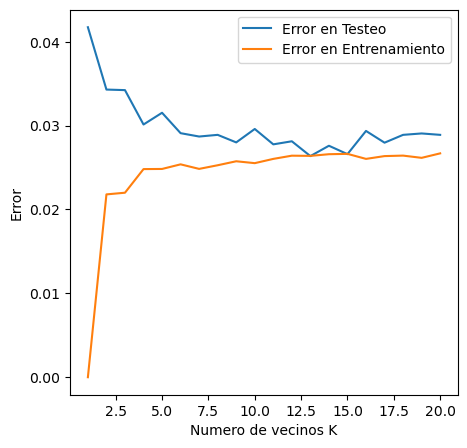

In [22]:
plt.figure(figsize = (5,5))
plt.xlabel('Numero de vecinos K')
plt.ylabel('Error')
plt.plot(kl, vl, label='Error en Testeo')
plt.plot(kl,v2, label='Error en Entrenamiento')
plt.legend()
plt.show()

In [25]:
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)
knn.fit(X_test, y_test)

entrenamiento = knn.score(X_train, y_train)
testeo = knn.score(X_test, y_test)

print(f'La efectividad con la data de entrenamiento es de {entrenamiento}, mientras que con la data de testeo es de {testeo}')

La efectividad con la data de entrenamiento es de 0.97375, mientras que con la data de testeo es de 0.968
